In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

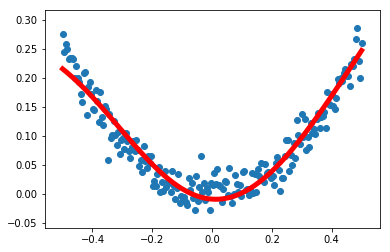

In [12]:
'''
样本
'''
# 随机生成200个随机点
# -0.5 - 0.5 的范围内 均匀分布
# 转换维度为 2维
# newaxis -> 插入维度
# 200 行 1 列
x_data = np.linspace(-0.5,0.5,200)[:, np.newaxis]
# 干扰项
# shape -> 矩阵的维度
# 形状与 x_data 一致
noise = np.random.normal(0,0.02,x_data.shape)
# x_data 实际为 U 型图， 加入干扰后散点会上下浮动
# x_data的平方加上随机干扰项
y_data = np.square(x_data) + noise
'''
输入层
'''
# 输入
# 定义两个placeholder(占位符) -> 依据样本定义
# 类型为32位浮点型，形状 -> 行 不确定，列 1列 
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])
'''
中间层
'''
# 定义神经网络中间层
# 权值 -> 连接输入层和中间层
# 1 个输入层神经元，10 个中间层神经元
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
# 偏置
# 全零矩阵，1 行 10 列
biases_L1 = tf.Variable(tf.zeros([1,10]))
# 信号总和
# matmul -> 矩阵相乘
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
# 中间层输出
# 激活函数 -> 用双曲正切函数来作为激活函数
L1 = tf.nn.tanh(Wx_plus_b_L1)
'''
输出层
'''
# 定义神经网络输出层
# 权值
# 10 个中间层神经元，1 个输出层神经元
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
# 偏置
biases_L2 = tf.Variable(tf.zeros([1,1]))
# 信号总和
# 输出层的输入就相当于是中间层的输出 -> L1
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + biases_L2
# 激活函数
# 预测结果
prediction = tf.nn.tanh(Wx_plus_b_L2)
'''
优化
'''
# 二次代价函数
# 误差值 = 真实值 - 预测值 的 平方 的 平均值
loss = tf.reduce_mean(tf.square(y - prediction))
# 优化 -> 梯度下降法
# 0.1 的学习率最下化误差值
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    # 初始化变量
    sess.run(tf.global_variables_initializer())
    # 训练次数
    for _ in range(2000):
        # 传入样本值
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    # 获得预测值
    prediction_value = sess.run(prediction, feed_dict={x:x_data})
    # 画图
    plt.figure()
    # 样本
    plt.scatter(x_data, y_data)
    # 预测结果
    # 样本值， 预测值， 线的颜色实线， 线宽 5
    plt.plot(x_data, prediction_value, 'r-', lw=5)
    plt.show()